In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification


plt.style.use("ggplot")

In [2]:
def plot_decision_regions(clf, X, y, fig=None, title='', xlabel='', ylabel='', figsize=(8,6)):
    """
    Dibuja las regiones de decisión de un clasificador de sklearn.
    Toma como argumentos:
        - clf: la instancia del clasificador entrenado.
        - X: las features del dataset.
        - y: las labels del dataset.
        - fig: la plt.figure() o axes a usar. Si es None, se creará una figure nueva.
        - title: el título del gráfico.
        - xlabel: el nombre del eje x.
        - ylabel: el nombre del eje y.
        - figsize: si fig es None, el tamaño de la figura a crear (ancho, alto)
    Devuelve:
        Nada. Simplemente dibuja el resultado con Matplotlib.
    """
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(list(reversed(['#FFAAAA', '#AAFFAA', '#AAAAFF'])))
    cmap_bold = ListedColormap(list(reversed(['#FF0000', '#00FF00', '#0000FF'])))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .05  # step size in the mesh
    x_min, x_max = X.values[:, 0].min() - .5, X.values[:, 0].max() + .5
    y_min, y_max = X.values[:, 1].min() - .5, X.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    if fig is None:
        figura = plt.figure(figsize=figsize)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=cmap_bold, edgecolors='k')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.xticks(())
        #plt.yticks(())
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
    else:
        fig.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        fig.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=cmap_bold, edgecolors='k')
        fig.set_title(title)
        fig.set_xlabel(xlabel)
        fig.set_ylabel(ylabel)
        fig.set_xticks(())
        fig.set_yticks(())
        fig.set_xlim(xx.min(), xx.max())
        fig.set_ylim(yy.min(), yy.max())

In [3]:
mi_dataset=make_classification(n_samples=1000,n_features=2,n_redundant=0,random_state=1234)

In [4]:
type(mi_dataset)

tuple

In [5]:
len(mi_dataset)

2

In [6]:
mi_dataset[0]

array([[-1.53349769,  0.14987123],
       [ 0.5487187 , -1.62034746],
       [ 1.3408384 , -1.74286702],
       ...,
       [ 0.62579176, -0.99446678],
       [-0.91736454,  1.16553183],
       [ 1.17467787, -0.78714923]])

In [7]:
mi_dataset[0].shape

(1000, 2)

In [8]:
mi_dataset[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [9]:
mi_df=pd.DataFrame(mi_dataset[0],columns=["X1","X2"])
mi_df.head()

,X1,X2
0,-1.533498,0.149871
1,0.548719,-1.620347
2,1.340838,-1.742867
3,-1.373225,-1.050193
4,-0.049637,-0.853435


In [10]:
mi_df["Target"]=mi_dataset[1]

In [11]:
mi_df

,X1,X2,Target
0,-1.533498,0.149871,1
1,0.548719,-1.620347,0
2,1.340838,-1.742867,0
3,-1.373225,-1.050193,0
4,-0.049637,-0.853435,0
...,...,...,...
995,-0.782564,-0.900800,0
996,1.638347,-2.214059,0
997,0.625792,-0.994467,0
998,-0.917365,1.165532,1


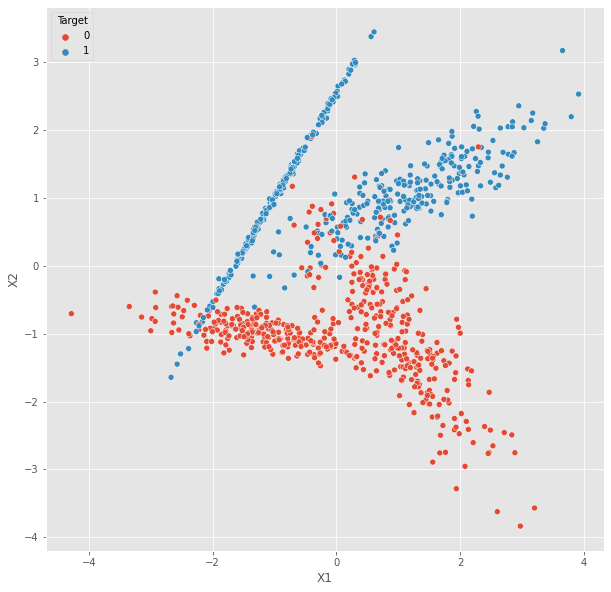

In [12]:
##Pintamos el df
##figure axes 

plt.figure(figsize=(10,10))

sns.scatterplot(x=mi_df["X1"],y=mi_df["X2"],hue=mi_df["Target"])
pass


In [13]:
minimo_del_minimo=np.min(np.min(mi_df,axis=0))

minimo_del_minimo

-4.283507035812976

In [14]:
mi_df["X1"]=mi_df["X1"]+np.abs(minimo_del_minimo)
mi_df["X2"]=mi_df["X2"]+np.abs(minimo_del_minimo)

In [15]:
mi_df["X1"]=mi_df["X1"]+1
mi_df["X2"]=mi_df["X2"]+1

PASO SIGUIENTE:

Separar en train y test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
que_saldra=train_test_split(mi_df,test_size=0.2)

In [18]:
que_saldra

[           X1        X2  Target
 645  5.186521  6.024646       1
 720  7.074183  3.446994       0
 113  3.604031  4.504633       0
 981  4.194831  4.092582       0
 317  5.916949  4.115103       0
 ..        ...       ...     ...
 296  4.933732  4.524265       0
 536  3.743590  5.467271       1
 921  7.222418  1.999045       0
 743  3.831170  5.581160       1
 543  4.349101  4.306022       0
 
 [800 rows x 3 columns],
            X1        X2  Target
 156  6.346940  4.451400       0
 932  4.606924  6.822292       1
 118  3.787146  5.496477       1
 572  3.690994  5.364409       1
 598  4.705794  4.142774       0
 ..        ...       ...     ...
 288  5.678265  5.937796       1
 158  5.230755  4.507215       0
 70   6.323217  3.797885       0
 819  4.572082  6.732426       1
 995  4.500943  4.382707       0
 
 [200 rows x 3 columns]]

In [19]:
train,test=train_test_split(mi_df,test_size=0.2,random_state=1234)

In [20]:

test

,X1,X2,Target
681,4.873331,7.163609,1
990,6.059901,3.959225,0
155,5.232654,7.706475,1
768,2.135518,4.529786,0
438,3.544438,5.110090,1
...,...,...,...
376,4.697209,6.954201,1
731,8.938963,8.459525,1
594,5.053266,7.399029,1
65,4.407899,6.426215,1


In [21]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
test

,X1,X2,Target
0,4.873331,7.163609,1
1,6.059901,3.959225,0
2,5.232654,7.706475,1
3,2.135518,4.529786,0
4,3.544438,5.110090,1
...,...,...,...
195,4.697209,6.954201,1
196,8.938963,8.459525,1
197,5.053266,7.399029,1
198,4.407899,6.426215,1


In [22]:
columnas=["X1","X2"]
X_train=train[columnas]
X_test=test[columnas]
y_train=train["Target"]
y_test=test["Target"]

In [23]:
X_train

,X1,X2
0,4.531399,6.629364
1,6.035804,5.424622
2,5.401401,5.927762
3,6.380956,6.475021
4,4.691213,6.967261
...,...,...
795,6.125963,4.599679
796,4.399080,6.441380
797,7.997473,2.826110
798,6.583549,4.001877


In [24]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
795    0
796    1
797    0
798    0
799    1
Name: Target, Length: 800, dtype: int32

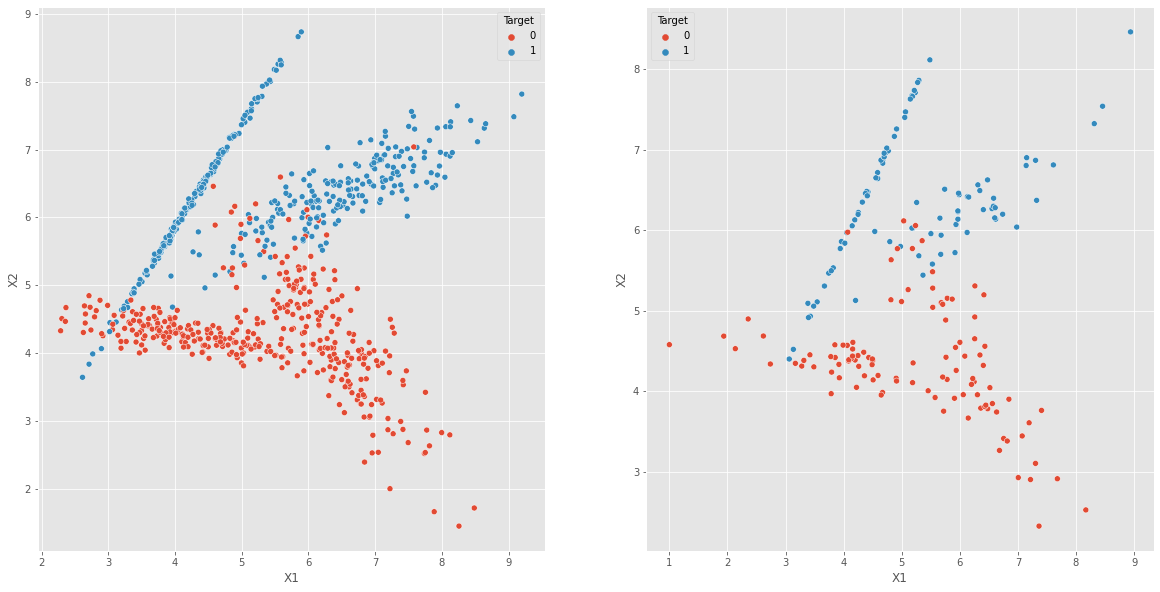

In [25]:
###Visualizar juntos train y test
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.scatterplot(x=train["X1"],y=train["X2"],hue=train["Target"],ax=axes[0])
sns.scatterplot(x=test["X1"],y=test["X2"],hue=test["Target"],ax=axes[1]);

In [26]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FE2877608>,
      dtype=object)

In [27]:
###Regresión logística
from sklearn.linear_model import LogisticRegression as LR


In [28]:
##Paso 1: Creo una instancia de LR

mi_lr=LR(random_state=1234)

In [29]:
mi_lr

LogisticRegression(random_state=1234)

In [30]:
##Paso 2: La entrenamos.
mi_lr.fit(X_train,y_train)

LogisticRegression(random_state=1234)

In [31]:
##Paso 3: Predecimos.

mi_lr.predict(X_test)


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [32]:
X_test.head()

,X1,X2
0,4.873331,7.163609
1,6.059901,3.959225
2,5.232654,7.706475
3,2.135518,4.529786
4,3.544438,5.110090


In [33]:
mi_lr.predict_proba(X_test)

array([[7.31041571e-04, 9.99268958e-01],
       [9.97614270e-01, 2.38572976e-03],
       [1.29739501e-04, 9.99870260e-01],
       [5.63338903e-01, 4.36661097e-01],
       [3.42998823e-01, 6.57001177e-01],
       [9.99979842e-01, 2.01581977e-05],
       [9.54471454e-01, 4.55285458e-02],
       [4.72222129e-01, 5.27777871e-01],
       [9.85178903e-01, 1.48210974e-02],
       [1.25635271e-01, 8.74364729e-01],
       [3.07368798e-03, 9.96926312e-01],
       [6.09702373e-02, 9.39029763e-01],
       [9.13518881e-01, 8.64811191e-02],
       [1.78640705e-03, 9.98213593e-01],
       [6.53106069e-03, 9.93468939e-01],
       [9.99984862e-01, 1.51375491e-05],
       [3.82869606e-02, 9.61713039e-01],
       [9.99839913e-01, 1.60087396e-04],
       [9.35851515e-02, 9.06414849e-01],
       [1.19352542e-01, 8.80647458e-01],
       [9.04976748e-01, 9.50232518e-02],
       [4.78932171e-01, 5.21067829e-01],
       [9.64226866e-03, 9.90357731e-01],
       [9.85866078e-01, 1.41339216e-02],
       [9.905344

In [34]:
mi_lr.score(X_test,y_test)

0.935

In [35]:
mi_lr.score(X_train,y_train)

0.94125

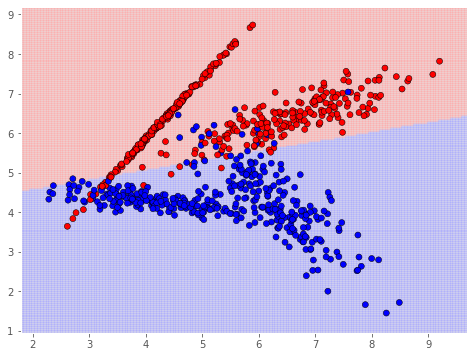

In [36]:
plot_decision_regions(mi_lr,X_train,y_train)

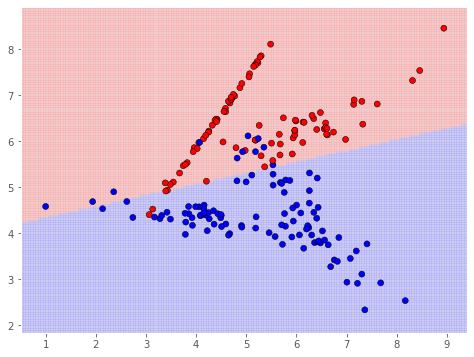

In [37]:
plot_decision_regions(mi_lr,X_test,y_test)

In [38]:
###Arbol de decisión

from sklearn.tree import DecisionTreeClassifier as DTC

In [39]:

arbol1=DTC(max_depth=3,min_samples_split=20,min_samples_leaf=20,random_state=1234)

In [40]:
arbol1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20,
                       random_state=1234)

In [41]:
print(arbol1.score(X_test,y_test))
print(arbol1.score(X_train,y_train))


0.925
0.9425


In [42]:
arbol2=DTC(max_depth=50,random_state=1234)

In [43]:
arbol2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50, random_state=1234)

In [44]:
print(arbol2.score(X_test,y_test))
print(arbol2.score(X_train,y_train))


0.91
1.0


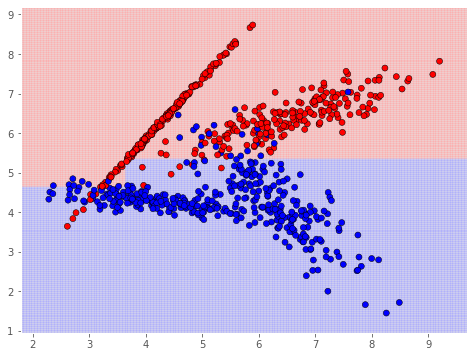

In [45]:
plot_decision_regions(arbol1,X_train,y_train)

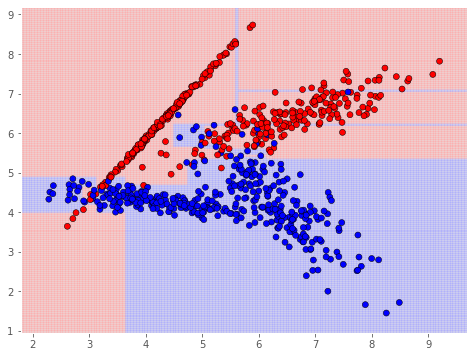

In [46]:
plot_decision_regions(arbol2,X_train,y_train)

In [47]:
from sklearn import tree

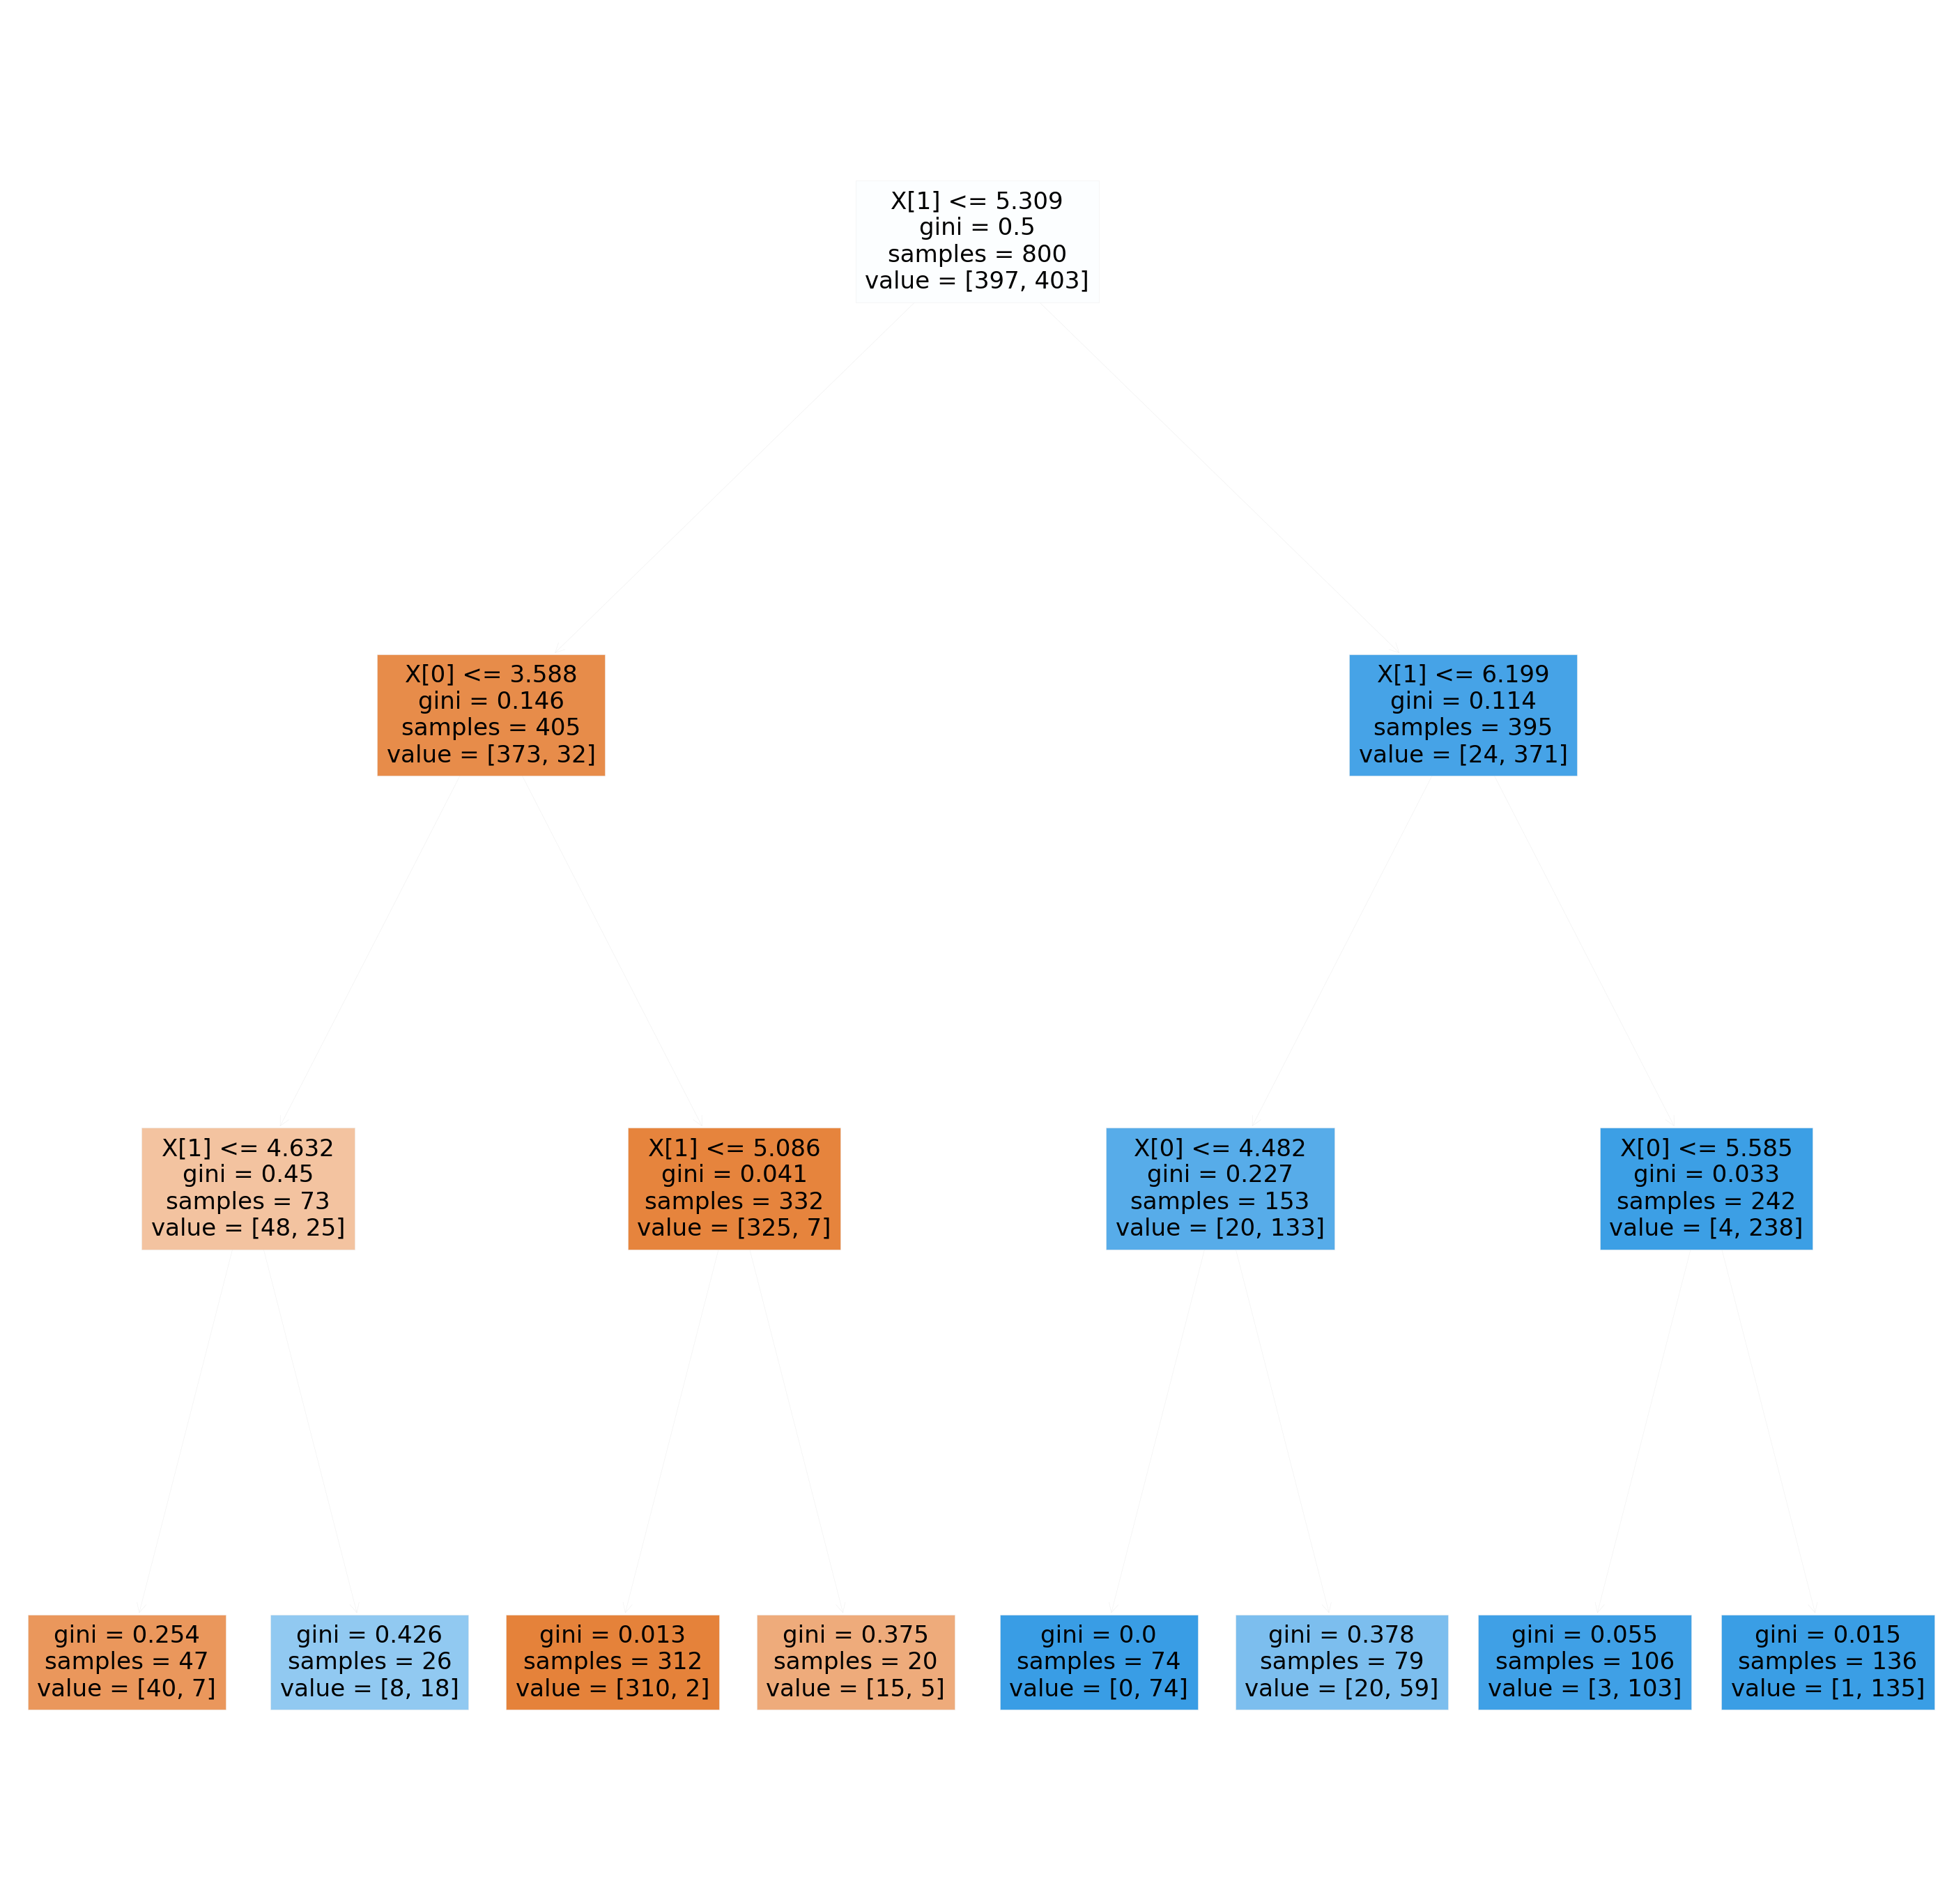

In [48]:
plt.figure(figsize=(50,50))
tree.plot_tree(arbol1,filled=True,label="all")
plt.plot();

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [50]:
mi_vecinos5=KNC(n_neighbors=5,n_jobs=-1)

In [51]:
mi_vecinos5.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [52]:
def saca_scores(modelo):
    print(modelo.score(X_train,y_train))
    print(modelo.score(X_test,y_test))

In [53]:

saca_scores(mi_vecinos5)

0.9675
0.955


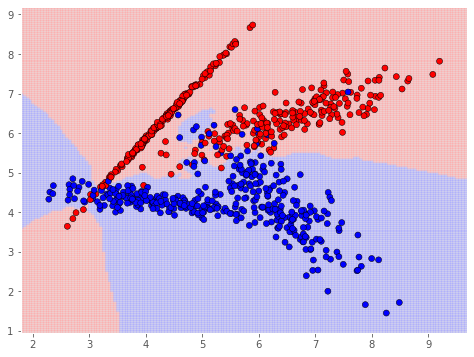

In [54]:
plot_decision_regions(mi_vecinos5,X_train,y_train)

In [55]:
##Receso sobre la regresión logística

mi_lr

LogisticRegression(random_state=1234)

In [56]:
mi_lr.coef_

array([[-0.92127541,  3.79574138]])

In [57]:
mi_lr.coef_[0]

array([-0.92127541,  3.79574138])

In [58]:
mi_lr.coef_[0][0]

-0.9212754110748794

In [59]:
mi_lr.intercept_

array([-15.48121905])

In [60]:
print("La ecuación es f(x1,x2=) %sX1 + %sX2 + %s " %(mi_lr.coef_[0][0],mi_lr.coef_[0][1],mi_lr.intercept_[0]))

La ecuación es f(x1,x2=) -0.9212754110748794X1 + 3.7957413781843443X2 + -15.481219046431121 


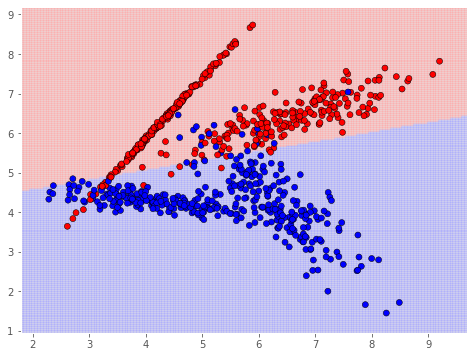

In [61]:
plot_decision_regions(mi_lr,X_train,y_train)

In [62]:
mi_lr_2=lambda x1,x2:-0.9212754110748794*x1 + 3.7957413781843443*x2 -15.481219046431121 

In [63]:
mi_lr_2(2,2)

-9.732287112212191

In [64]:
mi_lr_2(2,6)

5.450678400525188

In [65]:
mi_lr_2(0,0)

-15.481219046431121

In [66]:
mi_lr_2(2,2)

-9.732287112212191

In [67]:
mi_lr_2(3,2)

-10.653562523287071

In [68]:
mi_lr_2(2,3)

-5.936545734027847

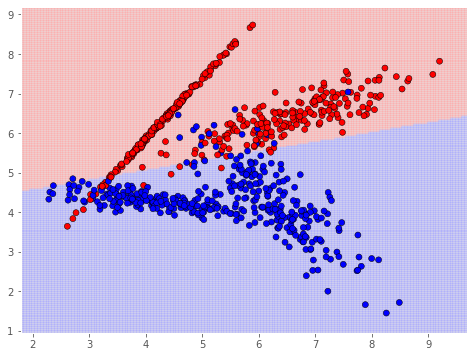

In [69]:
plot_decision_regions(mi_lr,X_train,y_train)

In [70]:
###Importancia de variables con árboles

arbol2

DecisionTreeClassifier(max_depth=50, random_state=1234)

In [71]:
arbol2.feature_importances_

array([0.13374453, 0.86625547])

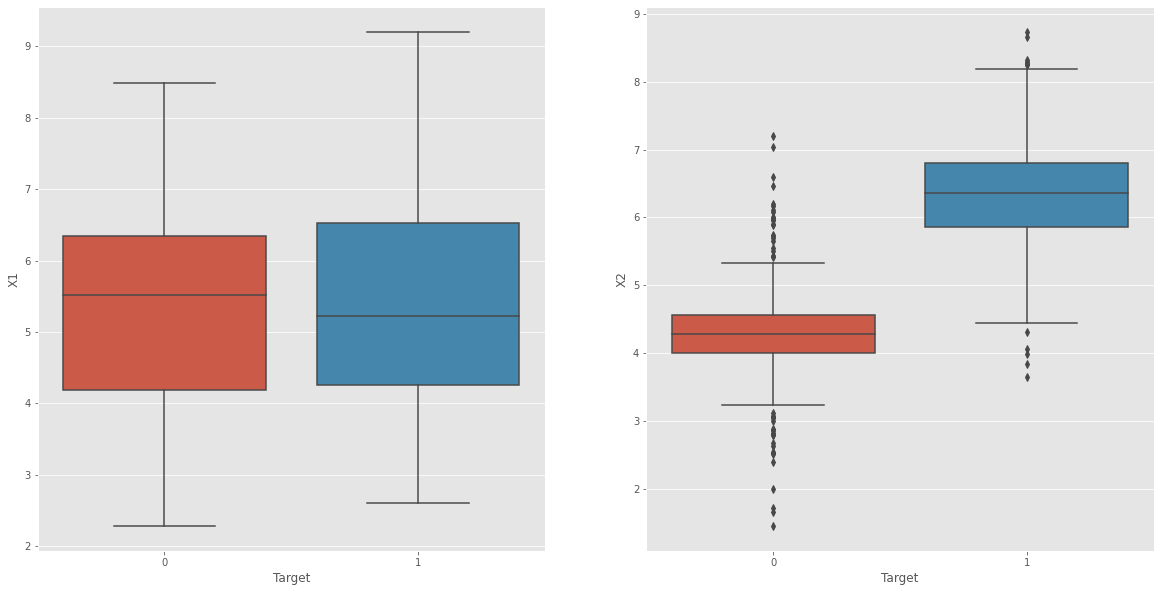

In [72]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.boxplot(y=train["X1"],x=train["Target"],ax=axes[0])
sns.boxplot(y=train["X2"],x=train["Target"],ax=axes[1])

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
mi_Bayes=GaussianNB()

In [75]:
mi_Bayes.fit(X_train,y_train)

GaussianNB()

In [76]:
saca_scores(mi_Bayes)

0.93
0.915


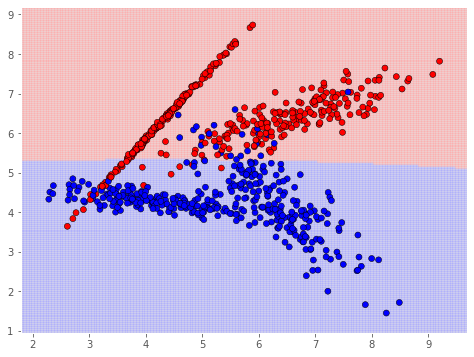

In [77]:
plot_decision_regions(mi_Bayes,X_train,y_train)

In [78]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [79]:
mi_rf=RFC(n_estimators=50,max_depth=2,random_state=1234,n_jobs=-1,verbose=3)

In [80]:
mi_rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50building tree 5 of 50
building tree 6 of 50building tree 7 of 50


building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50building tree 13 of 50

building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50building tree 21 of 50

building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50building tree 32 of 50

building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50building tree 37 of 50

building tree 38 of 50
building tree 39 of 50building tree 40 of 50
building tree 41 of 50
building tree 42 of 50building tree 43 of 50


building tree 44 of 

RandomForestClassifier(max_depth=2, n_estimators=50, n_jobs=-1,
                       random_state=1234, verbose=3)

In [81]:
saca_scores(mi_rf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


0.92875
0.92


In [82]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [83]:
mi_gb=GBC(learning_rate=0.1,n_estimators=500,max_depth=2,verbose=2,random_state=1234)

In [84]:
mi_gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2386            1.00s
         2           1.1176            0.99s
         3           1.0170            0.99s
         4           0.9319            1.11s
         5           0.8582            1.09s
         6           0.7952            1.23s
         7           0.7408            1.19s
         8           0.6938            1.17s
         9           0.6526            1.20s
        10           0.6154            1.17s
        11           0.5827            1.11s
        12           0.5532            1.10s
        13           0.5272            1.08s
        14           0.5053            1.07s
        15           0.4857            1.06s
        16           0.4669            1.03s
        17           0.4524            1.02s
        18           0.4377            1.01s
        19           0.4241            1.01s
        20           0.4101            1.01s
        21           0.4006            0.98s
        2

       253           0.0715            0.35s
       254           0.0713            0.35s
       255           0.0711            0.35s
       256           0.0709            0.35s
       257           0.0706            0.35s
       258           0.0703            0.35s
       259           0.0699            0.34s
       260           0.0695            0.34s
       261           0.0693            0.34s
       262           0.0692            0.34s
       263           0.0689            0.34s
       264           0.0684            0.34s
       265           0.0681            0.33s
       266           0.0677            0.33s
       267           0.0674            0.33s
       268           0.0669            0.33s
       269           0.0667            0.33s
       270           0.0664            0.33s
       271           0.0659            0.33s
       272           0.0657            0.33s
       273           0.0654            0.32s
       274           0.0651            0.32s
       275

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=1234,
                           verbose=2)

In [85]:
saca_scores(mi_gb)

1.0
0.925


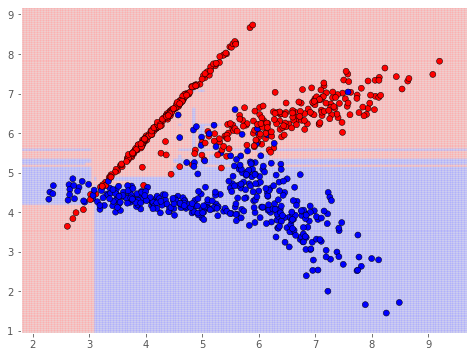

In [86]:
plot_decision_regions(mi_gb,X_train,y_train)

In [87]:
from sklearn.neural_network import MLPClassifier as MLP

In [88]:
red=MLP(hidden_layer_sizes=(100,100,100,100),activation='tanh',random_state=1234,max_iter=500,verbose=2,tol=0.0000100)

In [89]:
red.fit(X_train,y_train)

Iteration 1, loss = 0.60902647
Iteration 2, loss = 0.49342722
Iteration 3, loss = 0.43681412
Iteration 4, loss = 0.38901688
Iteration 5, loss = 0.33663366
Iteration 6, loss = 0.29007006
Iteration 7, loss = 0.24749767
Iteration 8, loss = 0.21353322
Iteration 9, loss = 0.20083835
Iteration 10, loss = 0.18800601
Iteration 11, loss = 0.19359459
Iteration 12, loss = 0.18501352
Iteration 13, loss = 0.18610541
Iteration 14, loss = 0.18428064
Iteration 15, loss = 0.18015651
Iteration 16, loss = 0.19185237
Iteration 17, loss = 0.19070751
Iteration 18, loss = 0.19209383
Iteration 19, loss = 0.19607156
Iteration 20, loss = 0.19595863
Iteration 21, loss = 0.18913705
Iteration 22, loss = 0.19004213
Iteration 23, loss = 0.18754323
Iteration 24, loss = 0.19248470
Iteration 25, loss = 0.18087939
Iteration 26, loss = 0.17969684
Iteration 27, loss = 0.17701702
Iteration 28, loss = 0.17755858
Iteration 29, loss = 0.17705768
Iteration 30, loss = 0.18182683
Iteration 31, loss = 0.19084643
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100, 100),
              max_iter=500, random_state=1234, tol=1e-05, verbose=2)

In [90]:
saca_scores(red)

0.9375
0.915


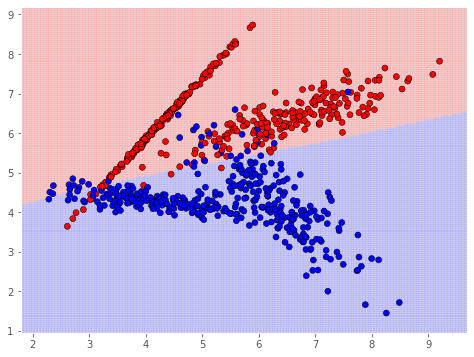

In [91]:
plot_decision_regions(red,X_train,y_train)

In [92]:

##Misma red pero con early stopping, es decir, reserva un 10 % para validar y contrasta las variacinones del resultado sobre ese 10 %
red2=MLP(hidden_layer_sizes=(100,100,100),activation='relu',random_state=1234,max_iter=500,verbose=2,tol=0.00001,early_stopping=True)

In [93]:
red2.fit(X_train,y_train)

Iteration 1, loss = 0.73955157
Validation score: 0.500000
Iteration 2, loss = 0.65795161
Validation score: 0.512500
Iteration 3, loss = 0.60396362
Validation score: 0.700000
Iteration 4, loss = 0.57512057
Validation score: 0.700000
Iteration 5, loss = 0.53723245
Validation score: 0.700000
Iteration 6, loss = 0.51779283
Validation score: 0.700000
Iteration 7, loss = 0.49641492
Validation score: 0.750000
Iteration 8, loss = 0.47890531
Validation score: 0.737500
Iteration 9, loss = 0.46386087
Validation score: 0.762500
Iteration 10, loss = 0.45044870
Validation score: 0.762500
Iteration 11, loss = 0.43930540
Validation score: 0.762500
Iteration 12, loss = 0.42818620
Validation score: 0.775000
Iteration 13, loss = 0.41704801
Validation score: 0.775000
Iteration 14, loss = 0.40550937
Validation score: 0.775000
Iteration 15, loss = 0.39698154
Validation score: 0.800000
Iteration 16, loss = 0.38262680
Validation score: 0.787500
Iteration 17, loss = 0.37136562
Validation score: 0.812500
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
              max_iter=500, random_state=1234, tol=1e-05, verbose=2)

In [94]:
red3=MLP(hidden_layer_sizes=(100,100,100,100),activation='relu',random_state=1234,max_iter=500,verbose=2,tol=0.00000001,early_stopping=True)

In [95]:
red3.fit(X_train,y_train)

Iteration 1, loss = 0.66695495
Validation score: 0.712500
Iteration 2, loss = 0.60430212
Validation score: 0.775000
Iteration 3, loss = 0.55850454
Validation score: 0.737500
Iteration 4, loss = 0.52309617
Validation score: 0.775000
Iteration 5, loss = 0.50173389
Validation score: 0.775000
Iteration 6, loss = 0.47782999
Validation score: 0.775000
Iteration 7, loss = 0.45784101
Validation score: 0.787500
Iteration 8, loss = 0.43728227
Validation score: 0.787500
Iteration 9, loss = 0.42308565
Validation score: 0.837500
Iteration 10, loss = 0.40410044
Validation score: 0.825000
Iteration 11, loss = 0.38407223
Validation score: 0.850000
Iteration 12, loss = 0.36230473
Validation score: 0.862500
Iteration 13, loss = 0.33915406
Validation score: 0.912500
Iteration 14, loss = 0.31470068
Validation score: 0.925000
Iteration 15, loss = 0.28730384
Validation score: 0.962500
Iteration 16, loss = 0.26198714
Validation score: 0.950000
Iteration 17, loss = 0.24069860
Validation score: 0.950000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100, 100),
              max_iter=500, random_state=1234, tol=1e-08, verbose=2)

In [96]:
saca_scores(red3)

0.92
0.92


In [97]:
from sklearn.model_selection import GridSearchCV as GS

In [98]:
modelo=MLP(max_iter=500,verbose=2)
param={'hidden_layer_sizes':[(100,100,100,100),(100,100,100,100,100)],'activation':["relu","tanh"]}

In [99]:
gs_red=GS(estimator=modelo,param_grid=param,n_jobs=-1,verbose=2,cv=5)

In [100]:
gs_red.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   20.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.7s finished


Iteration 1, loss = 0.69998835
Iteration 2, loss = 0.63060323
Iteration 3, loss = 0.58621126
Iteration 4, loss = 0.53366167
Iteration 5, loss = 0.48565254
Iteration 6, loss = 0.44893073
Iteration 7, loss = 0.42012288
Iteration 8, loss = 0.39558383
Iteration 9, loss = 0.37274043
Iteration 10, loss = 0.34778071
Iteration 11, loss = 0.31608101
Iteration 12, loss = 0.28997524
Iteration 13, loss = 0.26314215
Iteration 14, loss = 0.25473043
Iteration 15, loss = 0.22498876
Iteration 16, loss = 0.22201482
Iteration 17, loss = 0.20332289
Iteration 18, loss = 0.20511834
Iteration 19, loss = 0.18430272
Iteration 20, loss = 0.17857714
Iteration 21, loss = 0.18449034
Iteration 22, loss = 0.17933867
Iteration 23, loss = 0.17454335
Iteration 24, loss = 0.17575162
Iteration 25, loss = 0.17094653
Iteration 26, loss = 0.16574674
Iteration 27, loss = 0.16547859
Iteration 28, loss = 0.16502663
Iteration 29, loss = 0.16359477
Iteration 30, loss = 0.16218987
Iteration 31, loss = 0.16082832
Iteration 32, los

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, verbose=2), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 100, 100, 100),
                                                (100, 100, 100, 100, 100)]},
             verbose=2)

In [101]:
gs_red.best_estimator_.score(X_train,y_train)

0.9475

In [102]:
saca_scores(gs_red.best_estimator_)

0.9475
0.945


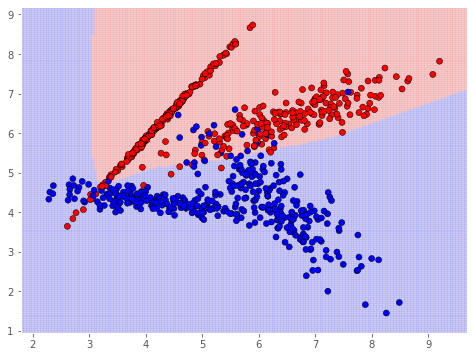

In [103]:
plot_decision_regions(gs_red.best_estimator_,X_train,y_train)

In [104]:
[(x,y,z) for x in range(10,101,10) for y in range(10,50,10) for z in range(5,30,5)]

[(10, 10, 5),
 (10, 10, 10),
 (10, 10, 15),
 (10, 10, 20),
 (10, 10, 25),
 (10, 20, 5),
 (10, 20, 10),
 (10, 20, 15),
 (10, 20, 20),
 (10, 20, 25),
 (10, 30, 5),
 (10, 30, 10),
 (10, 30, 15),
 (10, 30, 20),
 (10, 30, 25),
 (10, 40, 5),
 (10, 40, 10),
 (10, 40, 15),
 (10, 40, 20),
 (10, 40, 25),
 (20, 10, 5),
 (20, 10, 10),
 (20, 10, 15),
 (20, 10, 20),
 (20, 10, 25),
 (20, 20, 5),
 (20, 20, 10),
 (20, 20, 15),
 (20, 20, 20),
 (20, 20, 25),
 (20, 30, 5),
 (20, 30, 10),
 (20, 30, 15),
 (20, 30, 20),
 (20, 30, 25),
 (20, 40, 5),
 (20, 40, 10),
 (20, 40, 15),
 (20, 40, 20),
 (20, 40, 25),
 (30, 10, 5),
 (30, 10, 10),
 (30, 10, 15),
 (30, 10, 20),
 (30, 10, 25),
 (30, 20, 5),
 (30, 20, 10),
 (30, 20, 15),
 (30, 20, 20),
 (30, 20, 25),
 (30, 30, 5),
 (30, 30, 10),
 (30, 30, 15),
 (30, 30, 20),
 (30, 30, 25),
 (30, 40, 5),
 (30, 40, 10),
 (30, 40, 15),
 (30, 40, 20),
 (30, 40, 25),
 (40, 10, 5),
 (40, 10, 10),
 (40, 10, 15),
 (40, 10, 20),
 (40, 10, 25),
 (40, 20, 5),
 (40, 20, 10),
 (40, 20,

In [105]:
from sklearn.svm import SVC

In [106]:
mi_svm=SVC(C=500,gamma=0.01,probability=True)

In [107]:
mi_svm.fit(X_train,y_train)

SVC(C=500, gamma=0.01, probability=True)

In [108]:
saca_scores(mi_svm)

0.94875
0.945


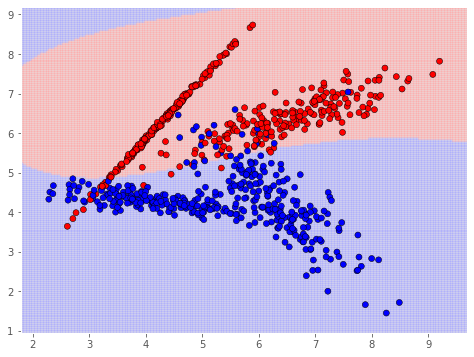

In [109]:
plot_decision_regions(mi_svm,X_train,y_train)

In [110]:
param_svm={"C":[0.01,0.1,1,10,100],"gamma":[0.1,1,10,100]}

modelo2=SVC(kernel="rbf",random_state=1234,probability=True)

In [111]:
gs_svm=GS(estimator=modelo2,param_grid=param_svm,verbose=2,cv=5)

In [112]:
gs_svm.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.01, gamma=0.1, total=   0.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.1s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.1s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.1s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.1s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.1s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.1s
[CV] C=0.01, gamma=10 ................................................
[CV] .

[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=1234),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 10, 100]},
             verbose=2)

In [113]:
gs_svm.best_estimator_

SVC(C=100, gamma=1, probability=True, random_state=1234)

In [114]:
saca_scores(gs_svm.best_estimator_)

0.9625
0.93


In [115]:
gs_svm.score(X_test,y_test)

0.93

In [116]:
gs_svm.predict_proba(X_train)

array([[0.09105926, 0.90894074],
       [0.63529479, 0.36470521],
       [0.04937148, 0.95062852],
       ...,
       [0.86947132, 0.13052868],
       [0.99851838, 0.00148162],
       [0.05949816, 0.94050184]])

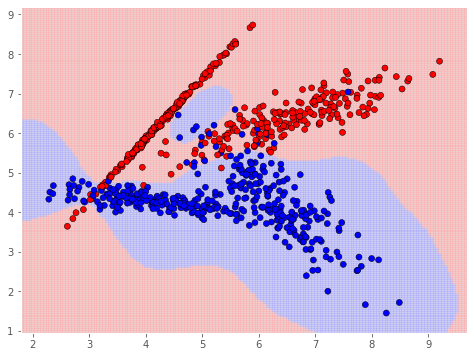

In [117]:
plot_decision_regions(gs_svm,X_train,y_train)

In [118]:
svm_lineal=SVC(kernel='linear',random_state=1234,probability=True)
param_svm={'C':[0.01,0.1,1,10,100,500]}

In [119]:
gs_svm_lineal=GS(estimator=svm_lineal,param_grid=param_svm,cv=5,verbose=2)

In [120]:
gs_svm_lineal.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.2s finished


GridSearchCV(cv=5,
             estimator=SVC(kernel='linear', probability=True,
                           random_state=1234),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 500]}, verbose=2)

In [121]:
saca_scores(gs_svm_lineal)

0.9425
0.93


In [122]:
gs_svm_lineal.best_estimator_

SVC(C=1, kernel='linear', probability=True, random_state=1234)

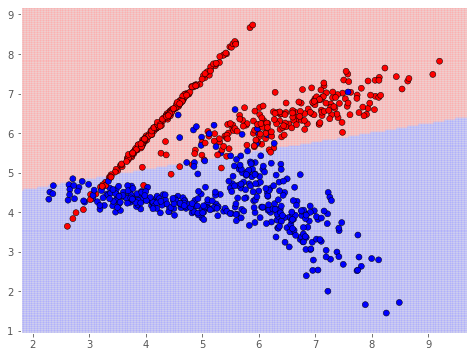

In [123]:
plot_decision_regions(gs_svm_lineal,X_train,y_train)

## MÉTRICAS

In [124]:
from sklearn.metrics import recall_score,precision_score,auc,accuracy_score,f1_score,roc_curve,roc_auc_score, confusion_matrix

In [125]:
gs_svm_lineal.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [126]:
recall_score(y_true=y_test,y_pred=gs_svm_lineal.predict(X_test))

0.9680851063829787

In [127]:
precision_score(y_true=y_test,y_pred=gs_svm_lineal.predict(X_test))

0.8921568627450981

In [128]:
X_test.iloc[0,:].values.reshape(1,2)

array([[4.87333126, 7.1636093 ]])

In [129]:
X_test.iloc[0,:].values

array([4.87333126, 7.1636093 ])

In [130]:
gs_svm_lineal.predict(X_test.iloc[0,:].values.reshape(1,2))

array([1])

In [131]:
gs_svm_lineal.predict_proba(X_test.iloc[0,:].values.reshape(1,2))

array([[1.30343526e-06, 9.99998697e-01]])

In [132]:
def saca_metricas(modelo,X=X_test,y=y_test):
    precision=precision_score(y_true=y,y_pred=modelo.predict(X))
    recall=recall_score(y_true=y,y_pred=modelo.predict(X))
    f1=f1_score(y_true=y,y_pred=modelo.predict(X))
    acc=accuracy_score(y_true=y,y_pred=modelo.predict(X))
    return {"Precision":precision,"recall":recall,"f1_score":f1,"accuracy":acc}
    

In [133]:
saca_metricas(gs_svm_lineal)

{'Precision': 0.8921568627450981,
 'recall': 0.9680851063829787,
 'f1_score': 0.9285714285714286,
 'accuracy': 0.93}

In [134]:
saca_metricas(gs_svm)

{'Precision': 0.9081632653061225,
 'recall': 0.9468085106382979,
 'f1_score': 0.9270833333333334,
 'accuracy': 0.93}

In [135]:
saca_metricas(gs_svm,X=X_train,y=y_train)

{'Precision': 0.9493975903614458,
 'recall': 0.9776674937965261,
 'f1_score': 0.9633251833740831,
 'accuracy': 0.9625}

In [136]:
saca_metricas(gs_svm_lineal,X=X_train,y=y_train)

{'Precision': 0.9429280397022333,
 'recall': 0.9429280397022333,
 'f1_score': 0.9429280397022333,
 'accuracy': 0.9425}

In [137]:
saca_metricas(gs_red)

{'Precision': 0.9108910891089109,
 'recall': 0.9787234042553191,
 'f1_score': 0.9435897435897436,
 'accuracy': 0.945}

In [138]:
saca_metricas(gs_svm_lineal)

{'Precision': 0.8921568627450981,
 'recall': 0.9680851063829787,
 'f1_score': 0.9285714285714286,
 'accuracy': 0.93}

In [139]:
def draw_roc(model, X, y, titulo="Roc curve", figsize=(12, 8)):
    """
    Function to plot the ROC Curve
    ARgs: A machine learning model, a dataframe with the independent variables (X), a series or colection with the target
    variable (y), the graph title and figsize
    Returns:  A plot with the roc curve


    """

    y_test_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, umbrales = roc_curve(y_true=y,y_score=y_test_proba)  # Aquí se extraen los ratios fpr y tpr que se pintarán después.
    plt.figure(figsize=figsize)
    plt.plot([0, 1], [0, 1], "r--")
    plt.plot(fpr, tpr, "b")
    plt.fill_between(fpr, tpr, alpha=0.4, color="yellow")
    plt.title(titulo)
    plt.show()
    return roc_auc_score(y_true=y,y_score=y_test_proba) ##bonus


In [140]:
gs_red.predict_proba(X_test)[:, 1]

array([9.86033742e-01, 3.88433659e-05, 9.92269301e-01, 1.25041134e-02,
       8.01987257e-01, 1.32516436e-07, 2.17047911e-02, 5.10304858e-01,
       3.93489090e-03, 8.64721317e-01, 9.76743540e-01, 9.43660531e-01,
       5.43793120e-02, 9.80758365e-01, 9.69423138e-01, 7.56373889e-08,
       9.48234915e-01, 8.66725412e-07, 9.28092765e-01, 9.02179422e-01,
       5.32701246e-02, 7.20589651e-01, 9.64656286e-01, 7.15134847e-04,
       2.61708359e-03, 3.90451139e-05, 7.28856543e-06, 2.26020104e-03,
       6.83585532e-07, 8.80819064e-01, 3.40643497e-02, 3.46259412e-03,
       5.84735165e-03, 1.50075082e-01, 1.33112316e-01, 9.30974833e-01,
       9.10546412e-01, 9.07952408e-01, 9.69446642e-01, 3.90517244e-01,
       1.89096566e-02, 8.53256520e-02, 3.33800589e-03, 5.12677799e-05,
       9.37572550e-01, 3.88512390e-02, 4.12828458e-01, 9.92390331e-02,
       1.31952313e-01, 8.97509164e-01, 9.59000781e-01, 3.92302393e-04,
       1.21948303e-01, 9.10463271e-01, 9.29137846e-01, 9.33178109e-01,
      

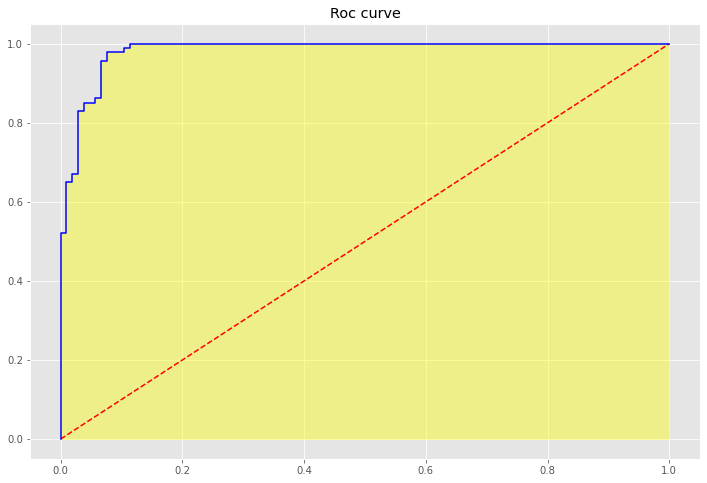

0.9822360497792052

In [141]:
draw_roc(gs_red,X=X_test,y=y_test)

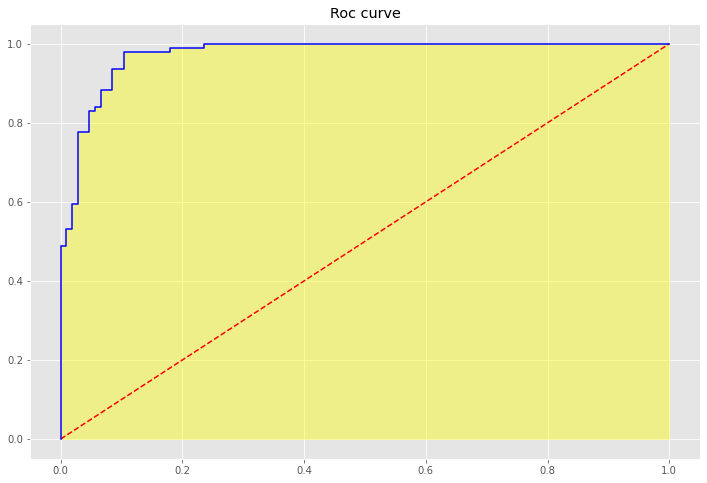

0.9740064231232437

In [142]:
draw_roc(gs_svm_lineal,X=X_test,y=y_test)

In [143]:
confusion_matrix(y_true=y_test,y_pred=gs_svm_lineal.predict(X_test))

array([[95, 11],
       [ 3, 91]], dtype=int64)

In [144]:
saca_metricas(gs_svm_lineal)

{'Precision': 0.8921568627450981,
 'recall': 0.9680851063829787,
 'f1_score': 0.9285714285714286,
 'accuracy': 0.93}

In [145]:
91/(91+3)

0.9680851063829787

In [146]:
91/(91+11)

0.8921568627450981

In [147]:
(91+95)/(91+95+3+11)

0.93

In [148]:
pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=gs_svm_lineal.predict(X_test)),index=["0 reales","1 reales"],columns=["0 predichos","1 predichos"])

,0 predichos,1 predichos
0 reales,95,11
1 reales,3,91


# REGRESION

In [217]:

from sklearn.datasets import make_regression

In [218]:
dataset_r=make_regression(n_samples=2000,n_features=200,n_informative=20,random_state=1234)

In [219]:
dataset_r

(array([[ 0.48699692,  0.94822793,  0.07981133, ..., -0.73613574,
          0.25399667,  0.85549067],
        [ 0.86712789, -0.37676543,  1.86122385, ..., -0.0981267 ,
         -0.29522995, -1.68121416],
        [-1.64667563,  0.06480085, -0.50361759, ...,  0.64277339,
          1.68427202, -0.03782309],
        ...,
        [-0.2698071 ,  1.27336927,  0.93071822, ..., -0.4764102 ,
         -1.23012623, -0.5632892 ],
        [-0.8289534 , -0.55476106, -0.22954518, ..., -0.88830364,
         -0.72932732, -0.42226767],
        [ 1.37837398, -0.39447747,  0.71930751, ..., -0.01167052,
          0.59598979,  1.10052272]]),
 array([ 133.5594303 , -508.85936187, -145.99200327, ...,  135.5545285 ,
        -224.15884174, -140.29721256]))

In [220]:
pd_reg=pd.DataFrame(dataset_r[0],columns=["col_%s" %x for x in range(1,201)])

In [221]:
pd_reg.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200
0,0.486997,0.948228,0.079811,-0.328464,-0.000305,0.672473,-1.824190,-0.282984,0.379939,-1.025093,...,0.199704,-0.077271,0.909737,0.284079,0.850146,-1.304301,-0.336800,-0.736136,0.253997,0.855491
1,0.867128,-0.376765,1.861224,2.145577,-1.213624,1.640725,-1.006792,-0.222936,0.838533,0.019735,...,-1.516113,0.794872,1.726704,-2.371557,-1.179150,0.065564,0.438104,-0.098127,-0.295230,-1.681214
2,-1.646676,0.064801,-0.503618,-0.221810,0.602244,-0.249407,0.800243,1.540905,0.611888,2.063344,...,-0.016395,0.832705,-1.927345,-0.178814,-0.786243,-0.725074,0.720961,0.642773,1.684272,-0.037823
3,0.026257,-0.339240,0.427103,-1.066854,-0.439425,0.429717,1.378827,2.011670,0.786828,0.073334,...,-0.672968,-1.227649,0.110990,-1.301619,-0.301572,-0.728817,0.566843,-1.280202,1.688606,-1.624767
4,-0.004979,-0.655851,0.897093,0.234887,-1.758763,1.181225,-0.645952,0.790531,0.278480,-0.751626,...,0.368582,-0.226609,0.537568,0.601783,0.221110,0.636842,0.086723,-0.857122,-0.607872,-1.760565


In [222]:
col_indep=list(pd_reg.columns)
col_indep

['col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14',
 'col_15',
 'col_16',
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26',
 'col_27',
 'col_28',
 'col_29',
 'col_30',
 'col_31',
 'col_32',
 'col_33',
 'col_34',
 'col_35',
 'col_36',
 'col_37',
 'col_38',
 'col_39',
 'col_40',
 'col_41',
 'col_42',
 'col_43',
 'col_44',
 'col_45',
 'col_46',
 'col_47',
 'col_48',
 'col_49',
 'col_50',
 'col_51',
 'col_52',
 'col_53',
 'col_54',
 'col_55',
 'col_56',
 'col_57',
 'col_58',
 'col_59',
 'col_60',
 'col_61',
 'col_62',
 'col_63',
 'col_64',
 'col_65',
 'col_66',
 'col_67',
 'col_68',
 'col_69',
 'col_70',
 'col_71',
 'col_72',
 'col_73',
 'col_74',
 'col_75',
 'col_76',
 'col_77',
 'col_78',
 'col_79',
 'col_80',
 'col_81',
 'col_82',
 'col_83',
 'col_84',
 'col_85',
 'col_86',
 'col_87',
 'col_88',
 'col_89',
 'col_90',
 'col_91',
 'col_92

In [223]:
pd_reg["Target"]=dataset_r[1]

In [224]:
pd_reg.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,Target
0,0.486997,0.948228,0.079811,-0.328464,-0.000305,0.672473,-1.824190,-0.282984,0.379939,-1.025093,...,-0.077271,0.909737,0.284079,0.850146,-1.304301,-0.336800,-0.736136,0.253997,0.855491,133.559430
1,0.867128,-0.376765,1.861224,2.145577,-1.213624,1.640725,-1.006792,-0.222936,0.838533,0.019735,...,0.794872,1.726704,-2.371557,-1.179150,0.065564,0.438104,-0.098127,-0.295230,-1.681214,-508.859362
2,-1.646676,0.064801,-0.503618,-0.221810,0.602244,-0.249407,0.800243,1.540905,0.611888,2.063344,...,0.832705,-1.927345,-0.178814,-0.786243,-0.725074,0.720961,0.642773,1.684272,-0.037823,-145.992003
3,0.026257,-0.339240,0.427103,-1.066854,-0.439425,0.429717,1.378827,2.011670,0.786828,0.073334,...,-1.227649,0.110990,-1.301619,-0.301572,-0.728817,0.566843,-1.280202,1.688606,-1.624767,-70.794743
4,-0.004979,-0.655851,0.897093,0.234887,-1.758763,1.181225,-0.645952,0.790531,0.278480,-0.751626,...,-0.226609,0.537568,0.601783,0.221110,0.636842,0.086723,-0.857122,-0.607872,-1.760565,130.269444


In [225]:
pd_reg.describe()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,Target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.032868,-0.012133,0.015486,-0.015145,-0.006174,-0.022277,-0.021791,-0.024544,0.008112,-0.036647,...,-0.020836,-0.022709,0.002464,0.036865,0.014121,-0.032382,-0.001497,0.003640,-0.027196,-2.280949
std,0.990185,1.008677,0.985445,1.013366,0.997948,0.997754,1.018119,1.000791,1.013038,0.991842,...,1.012337,0.980498,0.994864,1.017371,1.008900,0.997710,1.000490,0.995973,1.019058,226.069638
min,-3.599400,-3.555928,-3.745980,-3.140079,-4.083747,-3.503449,-3.165066,-3.987982,-3.776595,-3.209430,...,-3.260976,-3.886839,-3.254773,-3.601373,-3.635057,-3.612557,-3.446115,-3.938162,-3.398589,-749.101489
25%,-0.724676,-0.683482,-0.669094,-0.724539,-0.686373,-0.645295,-0.705593,-0.684503,-0.639242,-0.717541,...,-0.704942,-0.689901,-0.661056,-0.669306,-0.659871,-0.712142,-0.701109,-0.655675,-0.703810,-154.324687
50%,-0.038257,0.009314,0.048677,0.002107,0.003012,-0.037506,-0.035833,-0.021294,-0.001596,-0.057629,...,-0.018488,0.000337,-0.012161,0.033607,0.007286,-0.018455,0.009025,-0.006138,-0.034293,-4.169951
75%,0.661177,0.658923,0.685452,0.704798,0.675788,0.603180,0.666831,0.630599,0.696999,0.629129,...,0.674861,0.637202,0.653123,0.754723,0.681696,0.651510,0.688682,0.676023,0.647417,147.885312
max,3.937946,3.453954,3.339097,3.224095,3.431471,3.631178,3.369259,3.035071,3.376669,4.165657,...,2.766022,3.081991,3.328043,3.209316,3.182664,3.081536,3.493585,3.539701,3.425761,858.822948


In [226]:
pd_reg.corr()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,Target
col_1,1.000000,0.030974,0.020040,-0.009673,0.013756,-0.007530,-0.007045,-0.002544,0.001206,-0.014299,...,-0.014239,-0.026996,0.025889,-0.002672,-0.022276,-0.015253,0.010499,0.009745,0.018088,-0.012724
col_2,0.030974,1.000000,-0.024453,-0.027428,-0.000228,-0.027722,0.010254,0.012268,-0.013400,-0.016359,...,-0.010090,-0.066040,-0.016501,-0.018714,-0.033088,0.005700,-0.016747,0.024334,-0.005123,-0.018765
col_3,0.020040,-0.024453,1.000000,0.000846,-0.019863,0.015273,-0.010063,-0.008022,-0.001881,-0.006926,...,0.011096,-0.017500,-0.013353,0.030690,0.007339,-0.041596,-0.015475,0.005854,0.016860,-0.010869
col_4,-0.009673,-0.027428,0.000846,1.000000,0.024538,0.051998,-0.018567,-0.041931,-0.028541,0.029775,...,0.009816,0.015027,-0.000468,0.019741,0.014512,0.014697,-0.006720,0.030201,-0.048534,-0.009024
col_5,0.013756,-0.000228,-0.019863,0.024538,1.000000,-0.055407,0.002357,0.017310,-0.018114,-0.006128,...,0.005069,-0.014472,0.042517,0.026524,0.033838,-0.009323,0.018481,-0.019742,0.030987,0.047912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_197,-0.015253,0.005700,-0.041596,0.014697,-0.009323,0.002540,-0.012225,0.000222,-0.003723,-0.029473,...,0.012681,-0.006982,-0.012290,-0.033054,-0.007056,1.000000,-0.012022,-0.024776,-0.029252,-0.003399
col_198,0.010499,-0.016747,-0.015475,-0.006720,0.018481,0.007546,0.036561,-0.013118,0.000932,-0.004561,...,0.002211,-0.017930,0.027709,-0.028253,-0.007039,-0.012022,1.000000,0.026531,0.034823,0.035858
col_199,0.009745,0.024334,0.005854,0.030201,-0.019742,0.027684,-0.006257,0.008719,-0.006575,-0.036698,...,0.017429,-0.028973,0.006717,-0.012174,-0.015554,-0.024776,0.026531,1.000000,-0.001226,-0.007094
col_200,0.018088,-0.005123,0.016860,-0.048534,0.030987,-0.013348,-0.008721,-0.003168,0.018652,0.026458,...,0.025166,0.007643,0.017658,-0.036175,-0.012200,-0.029252,0.034823,-0.001226,1.000000,0.045897


In [227]:
pd_reg.corr().loc["Target",:].sort_values(ascending=False)[0:30]

Target     1.000000
col_56     0.409831
col_68     0.394659
col_90     0.347694
col_96     0.335068
col_194    0.308672
col_155    0.233512
col_124    0.222808
col_29     0.212845
col_186    0.210521
col_35     0.204531
col_55     0.176728
col_49     0.152143
col_161    0.137856
col_173    0.125115
col_33     0.106049
col_9      0.095212
col_64     0.091752
col_63     0.059544
col_114    0.059134
col_121    0.056854
col_5      0.047912
col_45     0.046143
col_200    0.045897
col_107    0.038877
col_37     0.038128
col_8      0.036169
col_198    0.035858
col_150    0.035198
col_32     0.034637
Name: Target, dtype: float64

In [228]:
train,test=train_test_split(pd_reg,test_size=0.2,random_state=1234)

In [229]:
X_train=train[col_indep]
X_test=test[col_indep]
y_train=train["Target"]
y_test=test["Target"]

In [230]:
from sklearn.linear_model import LinearRegression as LR

In [231]:
lr=LR()

In [232]:
lr.fit(X_train,y_train)


LinearRegression()

## MÉTRICAS

In [233]:
lr.score(X_test,y_test)

1.0

In [234]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE

In [235]:
MAE(y_true=y_test,y_pred=lr.predict(X_test))

4.206297463116293e-13

In [236]:
MSE(y_true=y_test,y_pred=lr.predict(X_test))


2.81569342731118e-25

In [237]:
##RMSE:

np.sqrt(MSE(y_true=y_test,y_pred=lr.predict(X_test)))

5.3063107968825e-13

In [238]:
def metricas_regresion(modelo,X=X_test,y=y_test):
    y_pred=modelo.predict(X)
    return {"r2":modelo.score(X,y),
           "RMSE":np.sqrt(MSE(y_true=y,y_pred=y_pred)),
           "MAE":MAE(y_true=y,y_pred=y_pred)}

In [239]:
metricas_regresion(lr)

{'r2': 1.0, 'RMSE': 5.3063107968825e-13, 'MAE': 4.206297463116293e-13}

In [240]:
pd.Series(lr.coef_,index=col_indep).sort_values(ascending=False)[0:20]

col_56     92.159394
col_68     90.330528
col_90     78.654120
col_96     76.824531
col_194    67.929301
col_155    53.650165
col_124    50.124973
col_186    46.395790
col_35     45.490266
col_29     41.257228
col_55     36.307757
col_33     34.365370
col_49     32.809009
col_173    31.564331
col_161    31.197444
col_64     24.236624
col_9      19.798108
col_152     5.542462
col_63      3.351809
col_27      1.391279
dtype: float64

In [241]:
variables_explicativas=list(pd.Series(lr.coef_,index=col_indep).sort_values(ascending=False)[0:20].index)
variables_explicativas

['col_56',
 'col_68',
 'col_90',
 'col_96',
 'col_194',
 'col_155',
 'col_124',
 'col_186',
 'col_35',
 'col_29',
 'col_55',
 'col_33',
 'col_49',
 'col_173',
 'col_161',
 'col_64',
 'col_9',
 'col_152',
 'col_63',
 'col_27']

In [242]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [243]:
arbol_r_1=DTR(max_depth=3,random_state=1234)

In [244]:
arbol_r_1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1234)

In [245]:
metricas_regresion(arbol_r_1)

{'r2': 0.22304391319896877,
 'RMSE': 198.225822652245,
 'MAE': 157.75071709539344}

In [246]:
metricas_regresion(arbol_r_1,X_train,y_train)

{'r2': 0.3359553179923619, 'RMSE': 184.3673695106523, 'MAE': 148.0216172987855}

In [247]:
mod=DTR()
parametros={"max_depth":[5,10,15,20,25,30,35,40]}




In [248]:
gs_r_arbol=GS(estimator=mod,param_grid=parametros,cv=5,verbose=2)

In [249]:
gs_r_arbol.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.1s
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=5, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.1s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.1s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.2s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.2s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.2s
[CV] max_depth=10 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]},
             verbose=2)

In [250]:
metricas_regresion(gs_r_arbol)

{'r2': 0.2871619401032838,
 'RMSE': 189.87047285252189,
 'MAE': 154.47856038535087}

In [251]:
gs_r_arbol.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [252]:
##Estandarizamos:

from sklearn.preprocessing import StandardScaler


In [253]:

estandarizador=StandardScaler()

In [254]:
estandarizador.fit(X_train)

StandardScaler()

In [255]:
X_train_escaladas=estandarizador.transform(X_train)

In [256]:

X_train_escaladas=pd.DataFrame(X_train_escaladas,columns=X_train.columns,index=X_train.index)
X_train_escaladas

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200
230,0.122460,-0.425386,0.726137,-0.152032,0.561174,-1.831989,-1.295878,0.541821,1.538229,-0.730660,...,-0.547657,-1.312739,0.383243,0.072731,0.524781,-0.241350,-0.703149,0.115810,-0.069031,-0.097597
1271,-0.847335,-1.778231,-0.577199,2.260264,-1.594976,-1.524881,1.267606,-0.311201,0.384153,2.155769,...,-1.298641,0.811337,-0.188834,-0.177847,0.359716,-0.808332,-0.558286,0.751605,-0.408836,1.042770
1311,-1.250121,-1.025146,0.061844,0.118139,0.496160,-0.162100,0.074757,-0.481467,0.330789,0.052622,...,-0.035963,0.548298,-2.019746,2.065664,0.716982,1.837437,-2.079765,-0.691395,-0.314341,-0.447301
414,0.147193,0.012547,1.548095,-0.360057,0.000848,-0.301181,1.196909,-0.291709,0.885576,0.367400,...,0.500424,0.285274,0.606519,-0.990086,-0.141823,-2.425040,1.144068,0.054658,0.127579,0.360451
811,-0.268880,0.352540,-0.090147,0.215134,1.075127,0.682522,-0.993480,-0.926602,-1.261088,1.514577,...,-1.520921,0.538107,1.104702,-0.320285,-0.022911,0.453023,0.114047,-1.353386,0.146448,-0.995990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0.112170,0.437870,1.354700,0.708604,-1.115590,-0.807016,0.325323,-1.210637,0.245921,0.041950,...,-0.749970,-1.375277,-0.664455,-1.194845,0.233227,-0.058425,-1.283908,0.551562,-1.583988,-0.459839
1077,-0.554151,0.339702,1.627252,1.436454,0.121755,0.092613,-0.094919,1.214030,0.538464,-0.277298,...,0.382406,0.772740,1.579926,1.412316,0.341270,-0.159283,0.713539,-0.434748,2.171004,-0.247035
1318,1.393895,2.087215,0.192421,0.973529,-0.448477,-0.908505,0.108509,0.583043,-2.417485,-0.045803,...,-0.769610,-0.181392,-1.816785,-0.579357,0.447419,-0.376295,0.262571,1.648092,0.352817,0.359853
723,-1.408610,1.589983,-0.882015,-1.698854,1.072082,-0.451566,0.145184,-0.798509,0.611331,-2.753501,...,0.018057,0.460367,0.748591,-0.976133,-3.500558,-1.038340,1.555628,0.243414,3.326250,-0.320370


In [257]:
X_test_estandarizado=estandarizador.transform(X_test)

In [258]:
X_test_escaladas=pd.DataFrame(X_test_estandarizado,columns=X_test.columns,index=X_test.index)
X_test_escaladas

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200
1748,0.120202,1.165447,0.283932,0.190700,-0.903285,0.568979,1.316967,1.066928,-0.490425,-1.480095,...,0.314316,-1.303744,-1.477889,1.816942,0.283129,0.117675,-0.562869,2.062432,-0.266388,1.318951
934,-1.533262,-0.889802,-1.251330,1.349809,-0.662374,1.585347,-0.533869,1.254329,-2.329490,0.261294,...,0.333936,2.048724,0.031957,-0.079945,-0.940234,-1.281667,0.347889,0.094078,1.373939,-0.902036
1033,1.900921,1.581024,-0.431823,0.378117,0.029958,-0.609793,-0.229997,-2.167549,-1.354846,0.053797,...,-0.775755,-0.710771,-0.849593,1.397734,0.026419,0.258852,-1.852960,-0.039869,0.253679,0.991204
243,-1.084136,-0.241120,0.813756,-2.602594,0.050297,1.252762,-0.391685,-0.562738,0.018939,0.715314,...,-0.109646,-0.103933,-0.751315,1.476513,1.302832,-0.153884,1.842034,0.928267,1.215844,0.527568
928,0.471775,1.532630,0.408180,0.045571,-0.863385,-0.889686,1.839124,-0.522384,-0.653252,-0.901977,...,-0.491464,-0.477519,0.628103,1.513584,-0.142599,0.119068,0.396395,-1.721774,1.016113,-0.687368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.680441,-1.639794,-0.946110,-0.019129,-1.751342,-0.960213,-1.379155,-0.127898,-0.262763,-0.341549,...,-0.770105,0.077373,-0.161144,1.011855,0.339528,0.226621,0.872687,-0.478308,-0.753126,0.214588
858,0.783470,-1.461893,-0.705308,0.825054,-0.247098,0.451922,-1.701386,1.424851,-0.440229,0.294691,...,0.620847,0.205133,2.262869,0.357588,0.537217,-0.823961,1.587040,-0.755063,-1.552528,-1.244123
1766,0.200026,0.583093,-0.735843,-0.885994,-1.049477,-0.015073,0.410313,-0.522298,1.212714,-0.552727,...,0.373327,0.361318,-0.620556,-2.845010,-1.275338,-0.355013,-0.413388,0.655063,-1.041707,-0.350183
1353,-0.363065,0.551781,0.179273,-0.200187,-0.639140,-0.110931,1.918319,-0.687782,1.721827,-1.211561,...,1.066451,-2.000444,0.008669,0.122412,-1.169908,-0.711448,-0.167416,0.224961,0.259302,-2.203169


In [259]:
estand_test=StandardScaler()

In [260]:
y_train_estand=estand_test.fit_transform(y_train.values.reshape(-1, 1))

In [261]:

y_test_estandarizado=estand_test.transform(y_test.values.reshape(-1, 1))

In [262]:
from sklearn.ensemble import RandomForestRegressor

In [263]:
RF_r=RandomForestRegressor(n_estimators=500,max_depth=3)

In [267]:
RF_r.fit(X=X_train_escaladas,y=y_train_estand)

C:\Users\smgabaldon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=3, n_estimators=500)

In [272]:
metricas_regresion(RF_r,y=y_test_estandarizado)

{'r2': 0.3041837844253672,
 'RMSE': 0.829132344031962,
 'MAE': 0.6614411321918419}

In [273]:
MAE(y_true=y_test,y_pred=estand_test.inverse_transform(RF_r.predict(X_test_estandarizado)))

149.7753962523992

In [274]:
from sklearn.metrics import r2_score


In [275]:
r2_score(y_true=y_test,y_pred=estand_test.inverse_transform(RF_r.predict(X_test_estandarizado)))

0.30438825120194757

## Pipeline

In [276]:
from sklearn.pipeline import Pipeline

In [278]:
RF_r.predict(X_test_estandarizado)

array([-0.37334492,  0.3667708 ,  0.40608727,  0.77136198, -0.58528815,
        0.49131913, -0.277794  ,  0.39874342, -0.20869685,  0.58983417,
       -0.38455075,  0.67729227,  0.38043342, -0.29748005, -0.35950572,
       -0.33756244,  0.82076869,  0.56241506,  0.46531241, -0.35521877,
        0.9052708 , -0.15127979,  0.35201387,  0.42701052, -0.45896895,
       -0.55420059, -0.00142483,  0.8527946 , -0.46934071, -0.43809925,
        0.3622606 , -0.04881237, -0.15614239,  0.3845019 , -0.35705776,
       -0.0690311 ,  0.19970859,  0.04138844, -0.41833728,  0.4272981 ,
        0.4158571 , -0.43480498,  0.45931008, -0.28498273,  0.39129736,
        0.2451758 ,  0.20836479, -0.82958687, -0.01411095,  0.41336626,
        0.17259291,  0.43460545, -0.0532758 , -0.1176896 ,  0.37004842,
        0.94822631, -0.22292103,  0.18632494,  0.27368904,  0.38481135,
        0.22751935,  0.37750555, -0.02587202,  0.70772608,  0.78988909,
        0.32633896,  0.2090758 , -0.04958349, -0.14430417,  0.34

In [281]:
y_test_estandarizado

array([[-5.99218844e-01],
       [ 1.23038648e-01],
       [-2.65190202e-01],
       [ 8.37164594e-01],
       [ 3.01552742e-01],
       [ 1.63997298e+00],
       [-5.05614081e-01],
       [ 2.63452571e-01],
       [ 6.35578784e-01],
       [ 1.85628056e+00],
       [-5.66788565e-01],
       [ 1.72446317e+00],
       [ 2.00792473e-01],
       [ 9.68951528e-01],
       [-3.04680936e-01],
       [-8.98196212e-02],
       [ 6.10043278e-01],
       [-1.29196647e-02],
       [ 6.73292333e-01],
       [ 4.41617233e-02],
       [ 1.64125199e+00],
       [-1.58953916e-02],
       [-9.67687590e-01],
       [-2.39225076e-01],
       [-1.95056430e+00],
       [-1.87381022e+00],
       [-1.53436171e+00],
       [ 1.25458683e+00],
       [-1.54660096e+00],
       [-1.55096055e+00],
       [-9.27411134e-01],
       [ 1.26422232e+00],
       [ 1.04132248e+00],
       [ 3.37408633e-02],
       [-1.48068960e-01],
       [ 8.83063924e-01],
       [ 3.31024619e-01],
       [ 1.35046887e+00],
       [-1.0

In [280]:
estand_test.inverse_transform(RF_r.predict(X_test_estandarizado))

array([ -84.7152652 ,   82.73469015,   91.62997505,  174.27277439,
       -132.66707098,  110.91354322,  -63.0970288 ,   89.96844217,
        -47.4639134 ,  133.20240754,  -87.25056776,  152.98965701,
         85.82583347,  -67.55096545,  -81.58417074,  -76.61953845,
        185.45095882,  126.99888006,  105.02956575,  -80.61425376,
        204.56942142,  -34.47339882,   79.39595829,   96.36382628,
       -104.08756156, -125.63356176,   -0.5689627 ,  192.69676855,
       -106.43415443,  -99.36582546,   81.71426419,  -11.29031557,
        -35.57355397,   86.74632029,  -81.03032423,  -15.86476784,
         44.93713999,    9.11746929,  -94.89471325,   96.42888979,
         93.84038357,  -98.62050194,  103.6715488 ,  -64.72346754,
         88.28378275,   55.22402221,   46.89559151, -187.9392524 ,
         -3.43917607,   93.27683514,   38.80226334,   98.08216713,
        -12.30015714,  -26.8736735 ,   83.47624618,  214.2880357 ,
        -50.68210995,   41.9091127 ,   61.67509626,   86.81633

In [282]:
##Estandarizado ´regresion lineal
estand=StandardScaler()
modelo_p=LR()

mi_pipe=Pipeline(steps=[("estandarizador",estand),("regresion",modelo_p)])

In [283]:
mi_pipe.fit(X_train,y_train)

Pipeline(steps=[('estandarizador', StandardScaler()),
                ('regresion', LinearRegression())])

In [284]:
mi_pipe.predict(X_test)

array([-1.35818867e+02,  2.75906937e+01, -6.02454404e+01,  1.89160506e+02,
        6.79792117e+01,  3.70794574e+02, -1.14640945e+02,  5.93591113e+01,
        1.43552050e+02,  4.19733806e+02, -1.28481570e+02,  3.89910339e+02,
        4.51823677e+01,  2.18977081e+02, -6.91801537e+01, -2.05681371e+01,
        1.37774684e+02, -3.16964933e+00,  1.52084678e+02,  9.74492015e+00,
        3.71083947e+02, -3.84290261e+00, -2.19184311e+02, -5.43708738e+01,
       -4.41558538e+02, -4.24193055e+02, -3.47393391e+02,  2.83601594e+02,
       -3.50162501e+02, -3.51148852e+02, -2.10071829e+02,  2.85781608e+02,
        2.35350889e+02,  7.38721782e+00, -3.37469534e+01,  1.99545153e+02,
        7.46471750e+01,  3.05294749e+02, -2.35825939e+02,  3.05176097e+02,
        1.39899877e+02,  7.90354226e+01,  8.71441803e+01,  5.96934056e+01,
        2.82725853e+02,  4.76220245e+01, -3.65615408e+01, -1.34501536e+02,
       -1.87167969e+02, -1.33958833e+02, -3.14847178e+02,  1.56016480e+02,
       -5.45780583e-02, -

## Selección automática de variables

In [285]:
from sklearn.feature_selection import RFE, RFECV

In [286]:
from sklearn.ensemble import ExtraTreesRegressor

In [287]:
mod_seleccionador=ExtraTreesRegressor(n_estimators=1000,max_depth=20)

In [288]:

selec=RFE(estimator=mod_seleccionador,n_features_to_select=20,step=1,verbose=1)

In [289]:
selec.fit(X_train,y_train)

Fitting estimator with 200 features.
Fitting estimator with 199 features.


KeyboardInterrupt: 

In [290]:
from sklearn.decomposition import PCA

In [291]:
pca=PCA()

In [292]:
pca.fit(X_train)

PCA()

In [293]:
pca.explained_variance_ratio_

array([0.00892119, 0.00883598, 0.00873649, 0.00871509, 0.00861242,
       0.00856046, 0.00839216, 0.00838072, 0.00823022, 0.0082147 ,
       0.00810985, 0.00806266, 0.00795003, 0.0078683 , 0.00786335,
       0.00781861, 0.00774096, 0.00771856, 0.00762746, 0.00760589,
       0.00757674, 0.00748869, 0.00747353, 0.00744977, 0.00730619,
       0.00727734, 0.00726473, 0.00717045, 0.00716442, 0.00710863,
       0.00710047, 0.00702275, 0.00700409, 0.00699312, 0.00694104,
       0.00688286, 0.0068519 , 0.00681474, 0.00678617, 0.0067377 ,
       0.0067043 , 0.00664669, 0.00663191, 0.0065829 , 0.00655254,
       0.00651048, 0.00643072, 0.00642175, 0.0063927 , 0.00635227,
       0.00634764, 0.00630878, 0.00627418, 0.00621706, 0.00615869,
       0.00612968, 0.00610168, 0.00605852, 0.00605281, 0.00599693,
       0.00597915, 0.00596324, 0.00594188, 0.00588307, 0.00584413,
       0.00577675, 0.0057516 , 0.00573432, 0.00571386, 0.00568585,
       0.0056199 , 0.00561549, 0.00560416, 0.00554407, 0.00551

In [294]:
np.cumsum(pca.explained_variance_ratio_)

array([0.00892119, 0.01775717, 0.02649366, 0.03520875, 0.04382117,
       0.05238162, 0.06077378, 0.0691545 , 0.07738472, 0.08559942,
       0.09370928, 0.10177194, 0.10972196, 0.11759026, 0.12545361,
       0.13327223, 0.14101318, 0.14873174, 0.1563592 , 0.16396508,
       0.17154183, 0.17903051, 0.18650404, 0.19395382, 0.20126001,
       0.20853735, 0.21580207, 0.22297253, 0.23013695, 0.23724557,
       0.24434604, 0.2513688 , 0.25837289, 0.26536601, 0.27230705,
       0.27918991, 0.28604181, 0.29285655, 0.29964273, 0.30638042,
       0.31308472, 0.31973142, 0.32636333, 0.33294623, 0.33949877,
       0.34600925, 0.35243997, 0.35886171, 0.36525441, 0.37160668,
       0.37795432, 0.38426311, 0.39053729, 0.39675434, 0.40291303,
       0.40904271, 0.4151444 , 0.42120292, 0.42725573, 0.43325265,
       0.4392318 , 0.44519504, 0.45113693, 0.45702   , 0.46286413,
       0.46864088, 0.47439248, 0.4801268 , 0.48584066, 0.49152651,
       0.4971464 , 0.5027619 , 0.50836606, 0.51391013, 0.51942

In [298]:
df_pca=pd.DataFrame(pca.explained_variance_ratio_,columns=["Varianza explicada"])

In [300]:
df_pca["Varianza explicada acumulada"]=np.cumsum(pca.explained_variance_ratio_)

In [301]:
df_pca

,Varianza explicada,Varianza explicada acumulada
0,0.008921,0.008921
1,0.008836,0.017757
2,0.008736,0.026494
3,0.008715,0.035209
4,0.008612,0.043821
...,...,...
195,0.002306,0.991267
196,0.002265,0.993531
197,0.002220,0.995752
198,0.002129,0.997881


In [302]:
df_pca[df_pca["Varianza explicada acumulada"]<=0.9]

,Varianza explicada,Varianza explicada acumulada
0,0.008921,0.008921
1,0.008836,0.017757
2,0.008736,0.026494
3,0.008715,0.035209
4,0.008612,0.043821
...,...,...
158,0.003340,0.885968
159,0.003313,0.889281
160,0.003296,0.892577
161,0.003247,0.895824


In [303]:
pca_90=PCA(n_components=163)

In [304]:
pca_90.fit(X_train)

PCA(n_components=163)

In [305]:
pca_90.explained_variance_ratio_

array([0.00892119, 0.00883598, 0.00873649, 0.00871509, 0.00861242,
       0.00856046, 0.00839216, 0.00838072, 0.00823022, 0.0082147 ,
       0.00810985, 0.00806266, 0.00795003, 0.0078683 , 0.00786335,
       0.00781861, 0.00774096, 0.00771856, 0.00762746, 0.00760589,
       0.00757674, 0.00748869, 0.00747353, 0.00744977, 0.00730619,
       0.00727734, 0.00726473, 0.00717045, 0.00716442, 0.00710863,
       0.00710047, 0.00702275, 0.00700409, 0.00699312, 0.00694104,
       0.00688286, 0.0068519 , 0.00681474, 0.00678617, 0.0067377 ,
       0.0067043 , 0.00664669, 0.00663191, 0.0065829 , 0.00655254,
       0.00651048, 0.00643072, 0.00642175, 0.0063927 , 0.00635227,
       0.00634764, 0.00630878, 0.00627418, 0.00621706, 0.00615869,
       0.00612968, 0.00610168, 0.00605852, 0.00605281, 0.00599693,
       0.00597915, 0.00596324, 0.00594188, 0.00588307, 0.00584413,
       0.00577675, 0.0057516 , 0.00573432, 0.00571386, 0.00568585,
       0.0056199 , 0.00561549, 0.00560416, 0.00554407, 0.00551

In [307]:
pca_90.transform(X_train)

array([[-0.00575993,  0.30113901, -0.95849133, ..., -0.29100078,
        -0.09905413, -0.63318995],
       [ 0.53863413,  0.29647719,  1.50739406, ..., -1.34538976,
         0.31249971, -0.0090997 ],
       [ 0.5981498 , -2.7063591 ,  0.1107315 , ..., -0.5931371 ,
        -0.26935919,  0.61491658],
       ...,
       [-0.70618807,  0.84773455, -0.27975986, ...,  1.08987442,
        -1.17226067, -1.3399739 ],
       [ 0.66232191, -1.21332943, -1.23578632, ..., -0.84162591,
         0.03572565, -0.54089622],
       [ 0.68035432, -0.20457232,  1.36544077, ...,  0.22857436,
         0.11088197,  0.79372438]])

In [308]:
pca_90.transform(X_train).shape

(1600, 163)

In [311]:
pca_r=PCA()
arbol=DTR()
SScaler=StandardScaler()


In [312]:
mi_pipe_pca=Pipeline(steps=[("estandarizador",SScaler),("CPpales",pca_r),("modelo",arbol)])

In [313]:
parametros_pipeline={"CPpales__n_components":[120,140,160,180],
                    "modelo__max_depth":[5,100]}

In [314]:
gs_pip=GS(estimator=mi_pipe_pca,param_grid=parametros_pipeline,cv=3,verbose=1234)

In [316]:
gs_pip.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] CPpales__n_components=120, modelo__max_depth=5 ..................
[CV]  CPpales__n_components=120, modelo__max_depth=5, score=-0.107, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] CPpales__n_components=120, modelo__max_depth=5 ..................
[CV]  CPpales__n_components=120, modelo__max_depth=5, score=-0.109, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] CPpales__n_components=120, modelo__max_depth=5 ..................
[CV]  CPpales__n_components=120, modelo__max_depth=5, score=-0.126, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[CV] CPpales__n_components=120, modelo__max_depth=100 ................
[CV]  CPpales__n_components=120, modelo__max_depth=100, score=-0.537, total=   0.2s
[Para

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('estandarizador', StandardScaler()),
                                       ('CPpales', PCA()),
                                       ('modelo', DecisionTreeRegressor())]),
             param_grid={'CPpales__n_components': [120, 140, 160, 180],
                         'modelo__max_depth': [5, 100]},
             verbose=1234)

In [317]:
gs_pip.best_estimator_

Pipeline(steps=[('estandarizador', StandardScaler()),
                ('CPpales', PCA(n_components=120)),
                ('modelo', DecisionTreeRegressor(max_depth=5))])

In [318]:
X_test.shape

(400, 200)

In [319]:
gs_pip.predict(X_test)

array([ -52.00296011, -126.83868138,  -52.00296011,   29.34492074,
         29.1834486 ,    1.85149126,  -52.00296011,   29.1834486 ,
       -126.83868138,   29.1834486 ,  -91.77605697,  129.63165133,
         29.1834486 ,  -52.00296011,  -52.00296011,  249.14910471,
        158.34564852, -341.78754773,  -52.00296011,   29.1834486 ,
        263.60634981,    1.85149126,  -52.00296011,   29.1834486 ,
        -91.77605697,  -93.41083574,  -52.00296011,  129.63165133,
        -93.41083574,   71.19113502,  -52.00296011,   97.90972838,
         29.1834486 ,  -91.77605697,   71.19113502,  -52.00296011,
        -52.00296011,   54.91745328,   29.1834486 ,  -52.00296011,
        158.34564852,   29.1834486 ,   29.1834486 ,   29.1834486 ,
        -52.00296011,  -91.77605697,  249.14910471,   29.1834486 ,
        -52.00296011, -197.67142219,   29.1834486 ,   29.1834486 ,
        -93.41083574,  -91.77605697, -113.29205467,  263.60634981,
          1.85149126,  -52.00296011,   71.19113502,  129.63165

In [321]:
pca.

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}